In [1]:
from keras.preprocessing.text import Tokenizer
import numpy as np
from string import punctuation
import numpy as np 
import re
import pandas as pd
import fasttext
import fasttext.util
import random
from itertools import permutations,combinations
from numpy.linalg import norm
import math

# Make Methods to get Most Similar and Most Distant Items From the List

In this section, I downloaded pre-trained fastText model and add item list. Later I get word vectors of a word list from a fasttext object. Finally, I get word distances of the list by cosine similarity.


### fastText

In [2]:
ft = fasttext.load_model(r'cc.tr.300.bin')


In [106]:
df = pd.read_csv("words.txt")
liste1=np.array(df).flatten()

In [107]:
liste1=[x.lower() for x in liste1]


In [108]:
liste=[]
for i in range(len(liste1)):
    if((len(liste1[i])==4) or (len(liste1[i])==5) or (len(liste1[i])==6)):
        liste.append(liste1[i])

liste=set(liste)
liste=list(liste)

In [109]:
random.shuffle(liste)


In [110]:
liste=np.array(liste).flatten()

In [111]:
liste= liste[:10000] # determine list limit

In [112]:
def get_word_vectors(word_list, ft):
    """
    Get word vectors of a word list from a fasttext object
    """
    return np.array(list(map(ft.get_word_vector, word_list)))

In [113]:
vectors = get_word_vectors(liste, ft)


In [114]:
def cos_similarity_w_matrix(vector, matrix):
    """
    Cosine similarity of a vector to all rows of matrix
    """
    return np.dot(vector, matrix.T) / (np.linalg.norm(vector) * np.linalg.norm(matrix, axis=1))

In [115]:
def cos_sim_matrix(matrix):
    """
    Pairwise cosine similarity of all rows of matrix
    """
    cs = lambda inp : cos_similarity_w_matrix(inp, matrix)
    return np.array(list(map(cs, matrix)))

In [116]:
word_distances = cos_sim_matrix(vectors)


In [117]:
def find_furthest(k,word_distances,liste):
    """
    Find furthest k most items in the list
    """
    indices = np.apply_along_axis(lambda x: np.argpartition(x, k)[:k], 1, word_distances)
    distant_words = np.apply_along_axis(lambda x: liste[x], 1, indices)
    dist_words_dict = dict(zip(liste, distant_words.tolist()))
    #return distant_words.tolist()
    return dist_words_dict


In [118]:
def find_furthest1(k,word_distances,liste):
    """
    Find furthest k most items in the list
    """
    indices = np.apply_along_axis(lambda x: np.argpartition(x, k)[:k], 1, word_distances)
    distant_words = np.apply_along_axis(lambda x: liste[x], 1, indices)
    dist_words_dict = dict(zip(liste, distant_words.tolist()))
    return distant_words.tolist()
    #return dist_words_dict


In [119]:
#get nearest
def find_nearest(k,word_distances,liste):
    """
    Find nearest k most items in the list
    """
    indices = np.apply_along_axis(lambda x: np.argsort(x, axis=0)[-k:-1], 1, word_distances)
    distant_words = np.apply_along_axis(lambda x:liste[x], 1, indices)
    dist_words_dict = dict(zip(liste, distant_words.tolist()))
    #return distant_words.tolist()
    return dist_words_dict


In [128]:
def cosine_sim(vector1, vector2):
    dot_product = np.dot(vector1, vector2)
    norm_1 = np.linalg.norm(vector1)
    norm_2 = np.linalg.norm(vector2)
    return dot_product / (norm_1 * norm_2)

In [144]:
"""
#get nearest
def find_nearest1(k,word_distances,liste):
    indices = np.apply_along_axis(lambda x: np.argsort(x, axis=0)[-k:-1], 1, word_distances)
    distant_words = np.apply_along_axis(lambda x:liste[x], 1, indices)
    dist_words_dict = dict(zip(liste, distant_words.tolist()))
    #return distant_words.tolist()
    return dist_words_dict
"""

'\n#get nearest\ndef find_nearest1(k,word_distances,liste):\n    indices = np.apply_along_axis(lambda x: np.argsort(x, axis=0)[-k:-1], 1, word_distances)\n    distant_words = np.apply_along_axis(lambda x:liste[x], 1, indices)\n    dist_words_dict = dict(zip(liste, distant_words.tolist()))\n    #return distant_words.tolist()\n    return dist_words_dict\n'

## Make Semantically Similar

In [134]:
buff1=[]
buff2=[]
buff3=[]
buff4=[]
buff5=[]

In [135]:
a=find_furthest1(1,word_distances,liste)
v=find_nearest(11,word_distances,liste)

In [141]:
np.random.seed(1)
a1=random.choice(a)[0]
print(a1)
v[a1]

platin


['tellür',
 'krom',
 'kobalt',
 'bronz',
 'metal',
 'dore',
 'elmas',
 'rodyum',
 'altın',
 'gümüş']

In [142]:
for a,b in combinations(v[a1],2):
  print((a,b,cosine_sim(ft[a],ft[b])))

('tellür', 'krom', 0.40018135)
('tellür', 'kobalt', 0.5095238)
('tellür', 'bronz', 0.33526978)
('tellür', 'metal', 0.49999186)
('tellür', 'dore', 0.28577524)
('tellür', 'elmas', 0.37048578)
('tellür', 'rodyum', 0.48217273)
('tellür', 'altın', 0.31756234)
('tellür', 'gümüş', 0.45416927)
('krom', 'kobalt', 0.4545854)
('krom', 'bronz', 0.42236686)
('krom', 'metal', 0.5662043)
('krom', 'dore', 0.45126578)
('krom', 'elmas', 0.44455338)
('krom', 'rodyum', 0.49963084)
('krom', 'altın', 0.4066041)
('krom', 'gümüş', 0.5580598)
('kobalt', 'bronz', 0.32072306)
('kobalt', 'metal', 0.43456727)
('kobalt', 'dore', 0.40209246)
('kobalt', 'elmas', 0.4017112)
('kobalt', 'rodyum', 0.47829214)
('kobalt', 'altın', 0.3154891)
('kobalt', 'gümüş', 0.48353374)
('bronz', 'metal', 0.45441043)
('bronz', 'dore', 0.4296428)
('bronz', 'elmas', 0.36916953)
('bronz', 'rodyum', 0.44496992)
('bronz', 'altın', 0.5579281)
('bronz', 'gümüş', 0.68783253)
('metal', 'dore', 0.3828024)
('metal', 'elmas', 0.43314567)
('metal', 

In [143]:
a=find_furthest1(1,word_distances,liste)
v=find_nearest(11,word_distances,liste)

In [184]:
np.random.seed(2)
a2=random.choice(a)[0]
print(a2)
v[a2]

saniye


['müddet',
 'litre',
 'birkaç',
 'anında',
 'asır',
 'yarım',
 'metre',
 'süre',
 'salise',
 'dakika']

In [185]:
for a,b in combinations(v[a2],2):
  print((a,b,cosine_sim(ft[a],ft[b])))

('müddet', 'litre', 0.21728332)
('müddet', 'birkaç', 0.46363768)
('müddet', 'anında', 0.27028227)
('müddet', 'asır', 0.4805348)
('müddet', 'yarım', 0.40437472)
('müddet', 'metre', 0.24361707)
('müddet', 'süre', 0.8169261)
('müddet', 'salise', 0.25215277)
('müddet', 'dakika', 0.4190392)
('litre', 'birkaç', 0.24389192)
('litre', 'anında', 0.11407625)
('litre', 'asır', 0.25717637)
('litre', 'yarım', 0.3817167)
('litre', 'metre', 0.46732423)
('litre', 'süre', 0.24092455)
('litre', 'salise', 0.25895962)
('litre', 'dakika', 0.3628612)
('birkaç', 'anında', 0.3199887)
('birkaç', 'asır', 0.42631492)
('birkaç', 'yarım', 0.5505956)
('birkaç', 'metre', 0.3296172)
('birkaç', 'süre', 0.54662037)
('birkaç', 'salise', 0.3422631)
('birkaç', 'dakika', 0.48267743)
('anında', 'asır', 0.16044973)
('anında', 'yarım', 0.23578696)
('anında', 'metre', 0.11873627)
('anında', 'süre', 0.3153502)
('anında', 'salise', 0.26078472)
('anında', 'dakika', 0.3777104)
('asır', 'yarım', 0.51725835)
('asır', 'metre', 0.3364

In [191]:
a=find_furthest1(1,word_distances,liste)
v=find_nearest(11,word_distances,liste)

In [198]:
np.random.seed(3)
a3=random.choice(a)[0]
print(a3)
v[a3]

popçu


['şarkı',
 'doğulu',
 'plakçı',
 'star',
 'makyör',
 'aktris',
 'ortaç',
 'dansçı',
 'artist',
 'cazcı']

In [199]:
for a,b in combinations(v[a3],2):
  print((a,b,cosine_sim(ft[a],ft[b])))

('şarkı', 'doğulu', 0.19506955)
('şarkı', 'plakçı', 0.33229667)
('şarkı', 'star', 0.250155)
('şarkı', 'makyör', 0.18677488)
('şarkı', 'aktris', 0.25527176)
('şarkı', 'ortaç', 0.3664509)
('şarkı', 'dansçı', 0.41837192)
('şarkı', 'artist', 0.31120628)
('şarkı', 'cazcı', 0.33724385)
('doğulu', 'plakçı', 0.2771845)
('doğulu', 'star', 0.3023268)
('doğulu', 'makyör', 0.2717349)
('doğulu', 'aktris', 0.26941893)
('doğulu', 'ortaç', 0.25674254)
('doğulu', 'dansçı', 0.37037918)
('doğulu', 'artist', 0.27068415)
('doğulu', 'cazcı', 0.41442367)
('plakçı', 'star', 0.2223122)
('plakçı', 'makyör', 0.31621915)
('plakçı', 'aktris', 0.25000963)
('plakçı', 'ortaç', 0.25182542)
('plakçı', 'dansçı', 0.31103444)
('plakçı', 'artist', 0.34639332)
('plakçı', 'cazcı', 0.4658131)
('star', 'makyör', 0.2798062)
('star', 'aktris', 0.40241387)
('star', 'ortaç', 0.22836141)
('star', 'dansçı', 0.35101002)
('star', 'artist', 0.48513997)
('star', 'cazcı', 0.27785176)
('makyör', 'aktris', 0.4066249)
('makyör', 'ortaç', 0.

In [200]:
a=find_furthest1(1,word_distances,liste)
v=find_nearest(11,word_distances,liste)

In [211]:
np.random.seed(4)
a4=random.choice(a)[0]
print(a4)
v[a4]

şema


['harita',
 'çizim',
 'plan',
 'resim',
 'örnek',
 'lejant',
 'grafik',
 'şablon',
 'tablo',
 'şemail']

In [212]:
for a,b in combinations(v[a4],2):
  print((a,b,cosine_sim(ft[a],ft[b])))

('harita', 'çizim', 0.4651608)
('harita', 'plan', 0.3929499)
('harita', 'resim', 0.4150269)
('harita', 'örnek', 0.18144977)
('harita', 'lejant', 0.52686757)
('harita', 'grafik', 0.4884672)
('harita', 'şablon', 0.3416543)
('harita', 'tablo', 0.37829506)
('harita', 'şemail', 0.29569745)
('çizim', 'plan', 0.44095656)
('çizim', 'resim', 0.6411704)
('çizim', 'örnek', 0.2805453)
('çizim', 'lejant', 0.4554462)
('çizim', 'grafik', 0.61551857)
('çizim', 'şablon', 0.4091582)
('çizim', 'tablo', 0.41024446)
('çizim', 'şemail', 0.27447495)
('plan', 'resim', 0.39524984)
('plan', 'örnek', 0.2536548)
('plan', 'lejant', 0.46726474)
('plan', 'grafik', 0.35948244)
('plan', 'şablon', 0.4053693)
('plan', 'tablo', 0.35791433)
('plan', 'şemail', 0.31171185)
('resim', 'örnek', 0.3105213)
('resim', 'lejant', 0.34391108)
('resim', 'grafik', 0.5647031)
('resim', 'şablon', 0.40593323)
('resim', 'tablo', 0.51106584)
('resim', 'şemail', 0.32394937)
('örnek', 'lejant', 0.22633918)
('örnek', 'grafik', 0.33341095)
('ö

In [213]:
a=find_furthest1(1,word_distances,liste)
v=find_nearest(11,word_distances,liste)

In [214]:
np.random.seed(5)
a5=random.choice(a)[0]
print(a5)
v[a5]

miting


['anma',
 'gezi',
 'şölen',
 'şenlik',
 'konvoy',
 'grev',
 'nevruz',
 'fuar',
 'tören',
 'konser']

In [215]:
for a,b in combinations(v[a5],2):
  print((a,b,cosine_sim(ft[a],ft[b])))

('anma', 'gezi', 0.38820878)
('anma', 'şölen', 0.35691664)
('anma', 'şenlik', 0.3665083)
('anma', 'konvoy', 0.19279015)
('anma', 'grev', 0.311771)
('anma', 'nevruz', 0.34952432)
('anma', 'fuar', 0.2604658)
('anma', 'tören', 0.48322773)
('anma', 'konser', 0.34075636)
('gezi', 'şölen', 0.36552185)
('gezi', 'şenlik', 0.3775853)
('gezi', 'konvoy', 0.35945565)
('gezi', 'grev', 0.27294302)
('gezi', 'nevruz', 0.30245396)
('gezi', 'fuar', 0.508578)
('gezi', 'tören', 0.3856284)
('gezi', 'konser', 0.43064046)
('şölen', 'şenlik', 0.66352713)
('şölen', 'konvoy', 0.32974112)
('şölen', 'grev', 0.19817492)
('şölen', 'nevruz', 0.36990768)
('şölen', 'fuar', 0.37284806)
('şölen', 'tören', 0.5286192)
('şölen', 'konser', 0.39353576)
('şenlik', 'konvoy', 0.26266053)
('şenlik', 'grev', 0.24849057)
('şenlik', 'nevruz', 0.44966555)
('şenlik', 'fuar', 0.44531497)
('şenlik', 'tören', 0.49220818)
('şenlik', 'konser', 0.4819809)
('konvoy', 'grev', 0.17120917)
('konvoy', 'nevruz', 0.1890665)
('konvoy', 'fuar', 0.2

## Make Semantically Dissimilar

To make a semantically dissimilar words list, define a condition in which the loop stops until reach the new list reaches "list_length" length. Create a new list by adding items from the list, and items are added according to "word_distances" but randomly choose items from the list of the first five most distant items. If the pairwise combination of items of the list of cosine similarity is higher than 0.15, I add them to a list (temp), then turn the list to a set (due to sets having unique items but no copy of it), then get the difference from the set which of all item to set which have items which have higher than 0.15 cosine similarity concerning pairwise combination

In [216]:
def random_dist_creator(word_distances,liste,list_length):
    temp9=[]
    temp=[]
    u=[]
    temp9.append(liste[np.argpartition(word_distances[random.randint(0,len(liste))],
                                                                random.randint(0,5))[random.randint(0,5)]])
   
    while True:
        if (len(u)==list_length):
            break
        a= random.randint(0,len(liste))
        b= random.randint(0,5)

        index=np.argpartition(word_distances[a], b)[b]          
        temp9.append(liste[index])
        for a,b in combinations(temp9,2):
            if(0.15<cosine_sim(ft[a],ft[b])):
                temp.append(a)
        u=list(set(temp9) - set(temp))
    return u

In [217]:
p=random_dist_creator(word_distances,liste,10)
p

['üğrüm',
 'teshir',
 'imzalı',
 'onejit',
 'dönüt',
 'bugüne',
 'mayşor',
 'raunt',
 'anot',
 'dümtek']

In [218]:
for a,b in combinations(p,2):
  print((a,b,cosine_sim(ft[a],ft[b])))

('üğrüm', 'teshir', -0.0026452688)
('üğrüm', 'imzalı', 0.052391384)
('üğrüm', 'onejit', 0.09350739)
('üğrüm', 'dönüt', 0.01998799)
('üğrüm', 'bugüne', -0.027754966)
('üğrüm', 'mayşor', -0.008935451)
('üğrüm', 'raunt', -0.019558216)
('üğrüm', 'anot', 0.048488326)
('üğrüm', 'dümtek', 0.013629623)
('teshir', 'imzalı', 0.0123430025)
('teshir', 'onejit', -0.052693803)
('teshir', 'dönüt', -0.07620521)
('teshir', 'bugüne', 0.0068211537)
('teshir', 'mayşor', 0.039005864)
('teshir', 'raunt', 0.0019415655)
('teshir', 'anot', 0.019140769)
('teshir', 'dümtek', 0.13692036)
('imzalı', 'onejit', -0.09320552)
('imzalı', 'dönüt', 0.095079236)
('imzalı', 'bugüne', 0.114585355)
('imzalı', 'mayşor', 0.014915848)
('imzalı', 'raunt', 0.01870672)
('imzalı', 'anot', 0.051434446)
('imzalı', 'dümtek', 0.017167414)
('onejit', 'dönüt', 0.06080442)
('onejit', 'bugüne', 0.09159954)
('onejit', 'mayşor', 0.06465521)
('onejit', 'raunt', 0.0453863)
('onejit', 'anot', -0.001207663)
('onejit', 'dümtek', 0.030796021)
('dö

In [258]:
# crate 80 items that include each list's item less than 0.15
res=[]
i=0
while i<5:
    res.append(random_dist_creator(word_distances,liste,10))
    i=i+1


In [259]:
res

[['raşe',
  'frer',
  'ayarı',
  'golfçü',
  'süvme',
  'armada',
  'şergil',
  'koala',
  'apoşi',
  'mezmur'],
 ['dügâh',
  'mayşor',
  'sahur',
  'çüngüş',
  'verdi',
  'rayına',
  'sızım',
  'çöpsüz',
  'kilüs',
  'içerik'],
 ['üğrüm',
  'onaylı',
  'müdrik',
  'jaguar',
  'oktrua',
  'dekore',
  'süyüm',
  'ortaya',
  'sağyağ',
  'hatmi'],
 ['üğrüm',
  'subye',
  'terviç',
  'i̇dil',
  'burslu',
  'bağrış',
  'utlu',
  'şurada',
  'salise',
  'beğeni'],
 ['üğrüm',
  'naçiz',
  'şansız',
  'beçene',
  'şüyu',
  'cepçi',
  'süvme',
  'lüknet',
  'teçhiz',
  'i̇dil']]

In [290]:
result_1 = []
for tup in res:
    result_1.append(list(tup))

In [241]:
# delete repeated items
def unique_values_in_list_of_lists(lst):
    result=[]
    result.append(list(set(x for l in lst for x in l)))
    return result

In [257]:
# finally crate lists contain 10 items
x=[]
w=[]
x= unique_values_in_list_of_lists(res)
#x1= x[:50]

w=[[x[i:i+10]] for i in range(0, len(x), 10)]
w[0]

[[['üğrüm',
   'onejit',
   'halef',
   'isleme',
   'kâin',
   'fobi',
   'hepçil',
   'afife',
   'recim',
   'kâhin',
   'rihter',
   'iglu',
   'nevton',
   'ruam',
   'bezzaz',
   'pıyrım',
   'morali',
   'korza',
   'ivgi',
   'hukşat',
   'hesabi',
   'sunu',
   'lagün',
   'yomsuz',
   'lüknet',
   'dekore',
   'keton',
   'safari',
   'koala',
   'tipo',
   'nimeti',
   'çerviş',
   'pünez',
   'i̇dil',
   'brülör',
   'gününü',
   'gelsin',
   'guard',
   'lala',
   'liga',
   'miat',
   'süvme',
   'maocu',
   'önce',
   'şurada',
   'mayo',
   'kurama',
   'apoşi',
   'kimine',
   'kilüs',
   'ısıcam',
   'patnos',
   'subye',
   'ölüme',
   'işar',
   'özek',
   'ivme',
   'mayşor',
   'miadı',
   'vandöz',
   'çüngüş',
   'süyüm',
   'zühul']]]

# Stats and Graphs

In [243]:
from scipy.stats import mannwhitneyu
import matplotlib.pyplot as plt


get cosine similarity values of similar lists and dissimilar lists.

first get similar ones

In [245]:
for a,b in combinations(v[a1],2):
  buff1.append(cosine_sim(ft[a],ft[b]))

In [247]:
for a,b in combinations(v[a2],2):
  buff2.append(cosine_sim(ft[a],ft[b]))

In [248]:
for a,b in combinations(v[a3],2):
  buff3.append(cosine_sim(ft[a],ft[b]))

In [249]:
for a,b in combinations(v[a4],2):
  buff4.append(cosine_sim(ft[a],ft[b]))

In [250]:
for a,b in combinations(v[a5],2):
  buff5.append(cosine_sim(ft[a],ft[b]))

then get dissimilar ones

In [271]:
buff6=[]
buff7=[]
buff8=[]
buff9=[]
buff10=[]

In [272]:
for a,b in combinations(res[0],2):
  buff6.append(cosine_sim(ft[a],ft[b]))

In [273]:
for a,b in combinations(res[1],2):
  buff7.append(cosine_sim(ft[a],ft[b]))

In [274]:
for a,b in combinations(res[2],2):
  buff8.append(cosine_sim(ft[a],ft[b]))

In [275]:
for a,b in combinations(res[3],2):
  buff9.append(cosine_sim(ft[a],ft[b]))

In [276]:
for a,b in combinations(res[4],2):
  buff10.append(cosine_sim(ft[a],ft[b]))

In [280]:
#Stats
from scipy.stats import mannwhitneyu

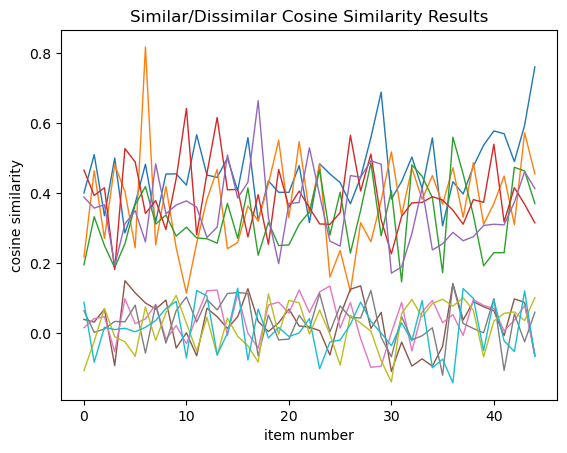

In [295]:
#graphs
a= buff1 # similar
b=buff2
c=buff3
d=buff4
e=buff5

f= buff6 # dissimilar
g=buff7
h=buff8
j=buff9
k=buff10


fig, ax = plt.subplots()

plt.xlabel('item number') 
plt.ylabel('cosine similarity') 
plt.title("Similar/Dissimilar Cosine Similarity Results")


ax.plot(a,linewidth=1.0)
ax.plot(b,linewidth=1.0)
ax.plot(c,linewidth=1.0)
ax.plot(d,linewidth=1.0)
ax.plot(e,linewidth=1.0)

ax.plot(f,linewidth=1.0)
ax.plot(g,linewidth=1.0)
ax.plot(h,linewidth=1.0)
ax.plot(j,linewidth=1.0)
ax.plot(k,linewidth=1.0)






plt.show()

In [296]:
similar=[]
similar=[a,b,c,d,e]
similar= np.array(similar)
similar=similar.flatten()


dissimilar=[]
dissimilar=[f,g,h,j,k]
dissimilar= np.array(dissimilar)
dissimilar=dissimilar.flatten()


In [297]:
stat, p = mannwhitneyu(similar, dissimilar)
print('Statistics=%.3f, p=%.2f' % (stat, p))

Statistics=50591.000, p=0.00


## Semantic Tool Class (STEM-T=> Semantic Tool for Episodic Memory Task)

Semantic item class will include turn word to vector (get_word_vectors) cos similiarities (cos_similarity_w_matrix, cos_sim_matrix,cos_sim_matrix, cosine_sim) and furthest elements (find_furthest) and nearest element (find_nearest)

In [95]:
class STEM(object):
    def __init__(self,word_list,ft,vecotr,matrix,vector1,vector2,u,threshold,word_distances,list_length):
        self.word_list=word_list
        self.ft= ft
        self.vector=vector
        self.matrix=matrix
        self.vector1=vector1
        self.vector2=vector2
        self.u=u
        self.threshold=threshold
        self.word_distances=word_distances
        self.list_length=list_length         
    def get_word_vectors(word_list, ft):
        return np.array(list(map(ft.get_word_vector, word_list)))
    def cos_similarity_w_matrix(vector, matrix):
        return np.dot(vector, matrix.T) / (np.linalg.norm(vector) * np.linalg.norm(matrix, axis=1))
    def cos_sim_matrix(matrix):
        cs = lambda inp : cos_similarity_w_matrix(inp, matrix)
        return np.array(list(map(cs, matrix)))
    def cos_sim_matrix(matrix):
        cs = lambda inp : cos_similarity_w_matrix(inp, matrix)
        return np.array(list(map(cs, matrix)))
    def inter_cosine_sim(vector1, vector2):
        dot_product = np.dot(vector1, vector2)
        norm_1 = np.linalg.norm(vector1)
        norm_2 = np.linalg.norm(vector2)
        return dot_product / (norm_1 * norm_2)
    def random_dist_creator(word_distances,liste,list_length):
        temp9=[]
        temp=[]
        u=[]
        temp9.append(liste[np.argpartition(word_distances[random.randint(0,len(liste))],
                                                                    random.randint(0,5))[random.randint(0,5)]])

        while True:
            if (len(u)==list_length):
                break
            a= random.randint(0,len(liste))
            b= random.randint(0,5)

            index=np.argpartition(word_distances[a], b)[b]          
            temp9.append(liste[index])
            for a,b in combinations(temp9,2):
                if(0.15<cosine_sim(ft[a],ft[b])):
                    temp.append(a)
            u=list(set(temp9) - set(temp))
        return u
#Returns random sequential distant elements according to some restrictions




    
#Returns random sequential distant elements according to some restrictions

